<div style="background-color: #ffcc00; padding: 5px;">
WARNING: This notebook has been generated with Google Collab, some cells may not have the correct format if executed from jupyter notebook.
</div>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load data

In [2]:
import os
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

path_folder_quora = '/content/gdrive/Shareddrives/NLP-quora_challenge/nlp_deliv1_materials'

# Train and Validation data
train_df = pd.read_csv(os.path.join(path_folder_quora, "quora_train_data.csv"))
# use this to provide the expected generalization results
test_df = pd.read_csv(os.path.join(path_folder_quora,"quora_test_data.csv"))

A_df, te_df = train_test_split(train_df, test_size=0.05, random_state=123)
tr_df, va_df = train_test_split(A_df, test_size=0.05, random_state=123)

In [3]:
tr_df

,id,qid1,qid2,question1,question2,is_duplicate
61482,125898,203030,203031,Is Java or C++ or C the most popular language ...,How do I develop a software which will have a ...,0
131546,36249,66113,66114,How do you convert direct speech into reported...,I feel weak at spoken English. I have sentence...,0
22927,199864,301469,301470,Where can I buy used wine barrels?,Where can you buy used wine barrels?,1
183520,277339,17728,138400,What was the best day of your life? (Excluding...,What is the Best Day of your life till date?,1
67694,392907,525647,525648,How is web-work.in works?,How do I get web designing work?,0
...,...,...,...,...,...,...
231903,206882,310426,310427,How many views I have to have on YouTube to ea...,"How many views, likes, and comments should a Y...",1
115066,298165,174701,420621,Are nihilist atheists?,Are all nihilist atheists?,1
35776,98943,164337,164338,How does views of sentiments of people relate ...,Does the increased mobile use of Quora as a pl...,0
300894,18300,34679,34680,What are the pros and cons of owning an EV (el...,Where is Mount Villarica located and how does ...,0


In [4]:
example0 = 61482
example1 = 22927
q01 = tr_df.loc[example0]["question1"]
q02 = tr_df.loc[example0]["question2"]
q11 = tr_df.loc[example1]["question1"]
q12 = tr_df.loc[example1]["question2"]
print(f"{q01} \n{q02} \n\n")
print(f"{q11} \n{q12}")

Is Java or C++ or C the most popular language amongst startups for backend development? 
How do I develop a software which will have a Java GUI and a C++ or C backend? 


Where can I buy used wine barrels? 
Where can you buy used wine barrels?


In [5]:
X_tr = [(df["question1"], df["question2"]) for index, df in tr_df.iterrows()]
y_tr = tr_df["is_duplicate"].values

X_val = [(df["question1"], df["question2"]) for index, df in va_df.iterrows()]
y_val = va_df['is_duplicate'].values

# Define Eval

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_scores(scores, y_true, display=False):
    '''
    function that evaluates the scores obtained from a non sklearn model.
    It returns of ROC AUC score, precision, recall as well as accuracy and f1.

    Args:
    - scores: predicted scores
    - y_true: labels of the data
    - display: is a boolean, if True it will print all evaluation metrics and grafics just by calling the function. If false, it will only return metrics ditionary.

    Returns:
    - y_pred: predictions
    - Metrics dict:
        Accuracy
        F1
        Precision
        Recall
        ROC AUC score
        ##########should we do log-loss????????
    - classificacion report with precision, recall, acc and f1 for each class
    - plots a confusion matrix
    '''
    y_pred = np.round(scores)
    metrics = {}

    accuracy = sklearn.metrics.accuracy_score(y_pred, y_true)
    roc_auc = sklearn.metrics.roc_auc_score(y_true, y_pred)
    precision = sklearn.metrics.precision_score(y_true, y_pred)
    recall = sklearn.metrics.recall_score(y_true, y_pred)
    f1 = sklearn.metrics.f1_score(y_true, y_pred)

    metrics = {'accuracy': accuracy, 'roc_auc':roc_auc, 'precision':precision, 'recall':recall, 'f1':f1}

    if display==True:
        print('METRICS:', '\n', '---'*30)
        print('Accuracy: ', metrics['accuracy'])
        print('F1: ',metrics['f1'])
        print('Precision: ', metrics['precision'])
        print('Recall: ', metrics['recall'])
        print('ROC AUC: ', metrics['roc_auc'])


        # printint classification report with acc, f1, precision and recall
        print('\n CLASSIFICATION REPORT:', '\n', '---'*30)
        print(sklearn.metrics.classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))

        # ploting confusion matrix
        print('CONFUSION MATRIX:', '\n', '---'*30)
        cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

    return metrics

# Sentence Similarity

It is based on the task sentence similarity [sentence similarity](https://huggingface.co/tasks/sentence-similarity). And using their library [SentenceTransformers](https://www.sbert.net/).

In [7]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Using all-MiniLM-L12-v2

This is the one that performs the best and is very fast and small. Later we can try one of the bigger ones.

| Model                | Performance Sentence Embeddings (14 Datasets) | Performance Semantic Search (6 Datasets) | Avg. Performance | Speed  | Model Size |
|----------------------|:---------------------------------------------:|:---------------------------------------:|:----------------:|:------:|:----------:|
| all-MiniLM-L6-v2     |                   68.06                         |                 49.54                     |       58.80      |  14200 |   80 MB    |


- Description:	All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
- Base Model:	nreimers/MiniLM-L6-H384-uncased
- Max Sequence Length:	256
- Dimensions:	384
- Normalized Embeddings:	true
- Suitable Score Functions:	dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
- Size:	80 MB
- Pooling:	Mean Pooling
- Training Data:	1B+ training pairs. For details, see model card.
- Model Card:	https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

# Our sentences to encode
sentences = [q01, q02, q11, q12]

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence: Is Java or C++ or C the most popular language amongst startups for backend development?
Embedding: [-1.97329018e-02 -4.80008051e-02 -5.67722553e-03 -6.05084486e-02
 -2.12986022e-02  3.52334715e-02 -3.50092873e-02  1.18244126e-01
  1.35166598e-02  2.26871334e-02 -6.62094951e-02 -1.23880785e-02
 -1.36167668e-02  2.34495271e-02  4.76881266e-02 -9.43069682e-02
  8.02635681e-03 -7.50828013e-02  7.27106929e-02 -1.13315612e-01
 -1.10615157e-01 -1.64094251e-02 -1.18175289e-02 -5.86128570e-02
  1.56398565e-01  6.41911104e-02  4.12566029e-02 -4.99189273e-02
 -4.60008392e-03 -4.28490117e-02 -9.96976271e-02  1.60259921e-02
  5.71338274e-02 -2.31937077e-02 -9.16915908e-02  5.71303256e-02
  1.00349328e-02 -1.14268452e-01 -2.78439615e-02 -1.76558513e-02
 -1.31540567e-01  3.18709351e-02  8.48129485e-03 -1.64684432e-03
  4.83716093e-03 -4.41810191e-02  2.77528893e-02 -1.44581599e-02
 -8.09077770e-02  1.83388963e-02  1.54899256e-02 -5.81300221e-02
  1.45356497e-02 -4.89692166e-02 -1.38893416e-

### Similarities

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
X = [[0, 0, 0], [1, 1, 1]]
Y = [[1, 0, 0], [1, 1, 0]]
cosine_similarity(X, Y)

array([[0.        , 0.        ],
       [0.57735027, 0.81649658]])

In [10]:
e01, e02, e11, e12 = embeddings

print(cosine_similarity([e01], [e02]))
print(cosine_similarity([e11], [e12]))

[[0.6096997]]
[[0.9927438]]


In [11]:
from sklearn.metrics.pairwise import euclidean_distances
X = [[0, 1], [1, 1]]
euclidean_distances(X, X)

array([[0., 1.],
       [1., 0.]])

In [12]:
print(euclidean_distances([e01], [e02]))
print(euclidean_distances([e11], [e12]))

[[0.8835161]]
[[0.12046738]]


## Classification with similarities

In [13]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

In [22]:
#%%timeit -n 1 -r 1

# To compare the different approaches we are using a reduced version of the dataset
# Otherwise it would take too long
# The whole dataset takes aprox 4' 30'' to run with GPU
X = X_tr#[0:30000]
q1s_tr = [x[0] for x in X]
q2s_tr = [x[1] for x in X]
emb1s_tr = model.encode(q1s_tr)
emb2s_tr = model.encode(q2s_tr)

In [23]:
# With val, it takes aprox 5 min with cpu, 30s with GPU
#%%timeit -n 1 -r 1

X = X_val
q1s_val = [x[0] for x in X]
q2s_val = [x[1] for x in X]
emb1s_val = model.encode(q1s_val)
emb2s_val = model.encode(q2s_val)

In [27]:
emb1s_tr.shape

(291897, 384)

In [28]:
from tqdm import tqdm
dists_tr = []

for emb1, emb2 in tqdm(zip(emb1s_tr, emb2s_tr)):
  dist = cosine_similarity(emb1.reshape(1, -1), emb2.reshape(1, -1))
  dists_tr.append(dist[0][0])

291897it [01:35, 3072.58it/s]


In [29]:
dists_val = []

for emb1, emb2 in tqdm(zip(emb1s_val, emb2s_val)):
  dist = cosine_similarity(emb1.reshape(1, -1), emb2.reshape(1, -1))
  dists_val.append(dist[0][0])

15363it [00:04, 3784.15it/s]


METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.5933736900344985
F1:  0.6443900495246769
Precision:  0.4756302521008403
Recall:  0.9987647785424387
ROC AUC:  0.6776002110533976

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      0.36      0.53      9696
    Positive       0.48      1.00      0.64      5667

    accuracy                           0.59     15363
   macro avg       0.74      0.68      0.58     15363
weighted avg       0.81      0.59      0.57     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


{'accuracy': 0.5933736900344985,
 'roc_auc': 0.6776002110533976,
 'precision': 0.4756302521008403,
 'recall': 0.9987647785424387,
 'f1': 0.6443900495246769}

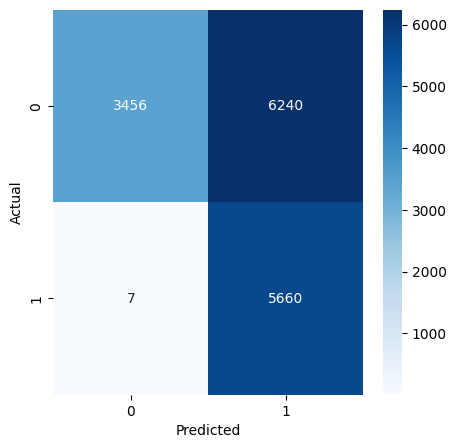

In [30]:
# First with the values themselves
evaluate_scores(dists_val, y_val, display=True)

The results are not bad, very good recall but many false positives. The similarity score should not be taken as is.

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.5304302545075832
F1:  0.6110631874056501
Precision:  0.43995031441658256
Recall:  1.0
ROC AUC:  0.6279909240924093

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      0.26      0.41      9696
    Positive       0.44      1.00      0.61      5667

    accuracy                           0.53     15363
   macro avg       0.72      0.63      0.51     15363
weighted avg       0.79      0.53      0.48     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


{'accuracy': 0.5304302545075832,
 'roc_auc': 0.6279909240924093,
 'precision': 0.43995031441658256,
 'recall': 1.0,
 'f1': 0.6110631874056501}

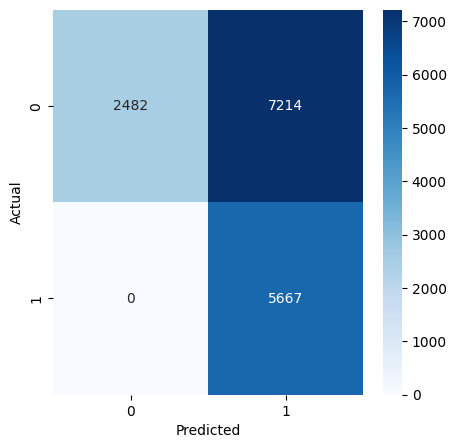

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Let's try scalating them
scaler = MinMaxScaler()
data = np.array(dists_val).reshape(-1, 1)
scaler.fit(data)
scores = scaler.transform(data)
evaluate_scores(scores, y_val, display=True)

The results are worse, we cannot take the min and max and just scale the data. I think the problem is that the ones that are similar are very close to 1 but the ones that are not can have very different values, with many outliers.

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7791446983011131
F1:  0.7070707070707071
Precision:  0.6921906693711968
Recall:  0.7226045526733722
ROC AUC:  0.7673975733663891

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.83      0.81      0.82      9696
    Positive       0.69      0.72      0.71      5667

    accuracy                           0.78     15363
   macro avg       0.76      0.77      0.76     15363
weighted avg       0.78      0.78      0.78     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


{'accuracy': 0.7791446983011131,
 'roc_auc': 0.7673975733663891,
 'precision': 0.6921906693711968,
 'recall': 0.7226045526733722,
 'f1': 0.7070707070707071}

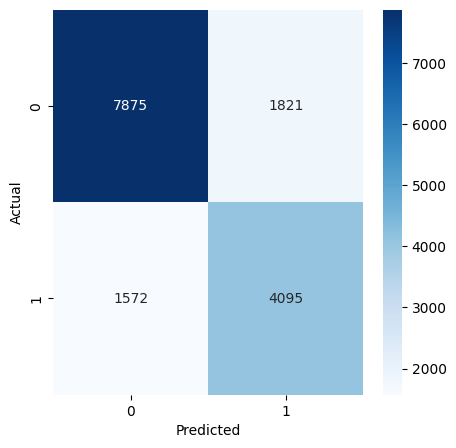

In [33]:
# Then with a logistic regression
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver="liblinear", random_state=123)
data_tr = np.array(dists_tr).reshape(-1, 1)
data_val = np.array(dists_val).reshape(-1, 1)
logistic.fit(data_tr, y_tr)
scores = logistic.predict(data_val)
evaluate_scores(scores, y_val, display=True)

This is not bad at all, competing with other results from other approaches in my teammates notebooks.

## Classification with embeddings

In [34]:
embs_tr = np.concatenate([emb1s_tr, emb2s_tr], axis=-1)
print(embs_tr.shape)

embs_val = np.concatenate([emb1s_val, emb2s_val], axis=-1)
print(embs_val.shape)

(291897, 768)
(15363, 768)


METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7155503482392762
F1:  0.548086866597725
Precision:  0.6620034973769673
Recall:  0.4676195517910711
ROC AUC:  0.6640387362915751

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.73      0.86      0.79      9696
    Positive       0.66      0.47      0.55      5667

    accuracy                           0.72     15363
   macro avg       0.70      0.66      0.67     15363
weighted avg       0.71      0.72      0.70     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


{'accuracy': 0.7155503482392762,
 'roc_auc': 0.6640387362915751,
 'precision': 0.6620034973769673,
 'recall': 0.4676195517910711,
 'f1': 0.548086866597725}

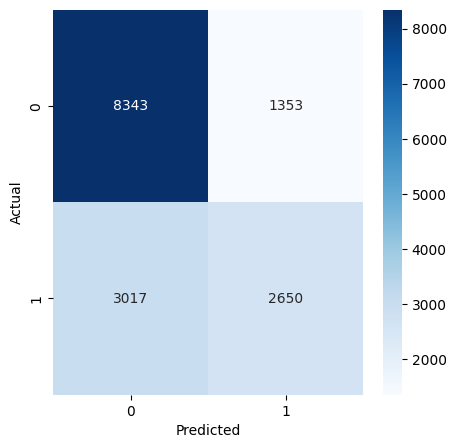

In [36]:
logistic = LogisticRegression(solver="liblinear", random_state=123)
logistic.fit(embs_tr, y_tr)
scores = logistic.predict(embs_val)
evaluate_scores(scores, y_val, display=True)

It's a bit worse.

Let's try with other classifiers.

In [37]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier

rf_model = RandomForestClassifier(n_estimators=50, max_depth = 5, random_state=123)
xgb_model = XGBClassifier(random_state=123)
svc_model = SVC(random_state=123, kernel = 'linear')
nb_model = MultinomialNB()
lgbm_model = LGBMClassifier(random_state=123)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.6500683460261668
F1:  0.10040160642570281
Precision:  0.970873786407767
Recall:  0.05293806246691371
ROC AUC:  0.5260049223225658

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.64      1.00      0.78      9696
    Positive       0.97      0.05      0.10      5667

    accuracy                           0.65     15363
   macro avg       0.81      0.53      0.44     15363
weighted avg       0.76      0.65      0.53     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


{'accuracy': 0.6500683460261668,
 'roc_auc': 0.5260049223225658,
 'precision': 0.970873786407767,
 'recall': 0.05293806246691371,
 'f1': 0.10040160642570281}

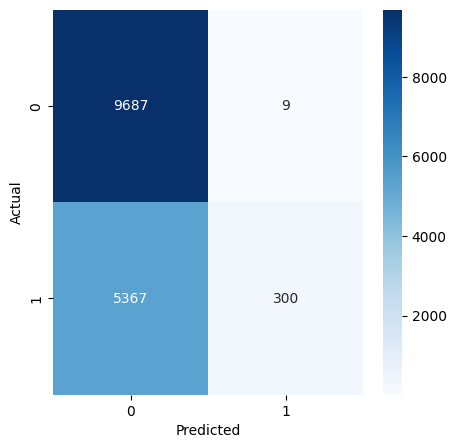

In [38]:
rf_model.fit(embs_tr, y_tr)
scores = rf_model.predict(embs_val)
evaluate_scores(scores, y_val, display=True)

Not very good, it predicted almost everything as 0.

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.8366855431881793
F1:  0.7805475378290914
Precision:  0.7738466874783212
Recall:  0.78736544909123
ROC AUC:  0.8264385001231727

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      9696
    Positive       0.77      0.79      0.78      5667

    accuracy                           0.84     15363
   macro avg       0.82      0.83      0.83     15363
weighted avg       0.84      0.84      0.84     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


{'accuracy': 0.8366855431881793,
 'roc_auc': 0.8264385001231727,
 'precision': 0.7738466874783212,
 'recall': 0.78736544909123,
 'f1': 0.7805475378290914}

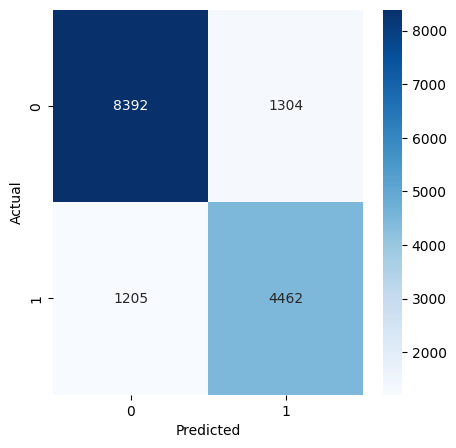

In [39]:
xgb_model.fit(embs_tr, y_tr)
scores = xgb_model.predict(embs_val)
evaluate_scores(scores, y_val, display=True)

In [ ]:
svc_model.fit(embs_tr, y_tr)
scores = svc_model.predict(embs_val)
evaluate_scores(scores, y_val, display=True)

In [ ]:
nb_model.fit(embs_tr, y_tr)
scores = nb_model.predict(embs_val)
evaluate_scores(scores, y_val, display=True)

In [ ]:
lgbm_model.fit(embs_tr, y_tr)
scores = lgbm_model.predict(embs_val)
evaluate_scores(scores, y_val, display=True)

# Pretrained CrossEncoder

Next, we will try a pretrained model from this [library](https://www.sbert.net/docs/pretrained_cross-encoders.html). This model takes two sentences as input and applies a BERT to encode them and then a Classifier.


In [26]:
from sentence_transformers import CrossEncoder

#model_name = "cross-encoder/ms-marco-MiniLM-L-6-v2"
model_name = "cross-encoder/quora-distilroberta-base"

model = CrossEncoder(model_name, max_length=512)
scores = model.predict([("Query1", "Paragraph1"), ("Query1", "Paragraph2")])

# For Example
scores = model.predict([
    (q01, q02),
    (q11, q12),
])

In [27]:
scores

array([3.3519766e-04, 9.6311450e-01], dtype=float32)

In [38]:
# Try the model without fine-tuning

X_val = [(df["question1"], df["question2"]) for index, df in va_df.iterrows()]
y_va = va_df['is_duplicate'].values

In [37]:
scores = model.predict(X_val)

In [44]:
import sklearn

print('\n CLASSIFICATION REPORT:', '\n', '---'*30)
print(sklearn.metrics.classification_report(y_va, np.round(scores), target_names=['Negative', 'Positive']))


 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.93      0.94      0.94      9696
    Positive       0.90      0.88      0.89      5667

    accuracy                           0.92     15363
   macro avg       0.91      0.91      0.91     15363
weighted avg       0.92      0.92      0.92     15363



In [43]:
import numpy as np
np.round(scores)

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.9179847685998829
F1:  0.8873591989987485
Precision:  0.8992571117956152
Recall:  0.8757720134109759
ROC AUC:  0.9092143895437718

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.93      0.94      0.94      9696
    Positive       0.90      0.88      0.89      5667

    accuracy                           0.92     15363
   macro avg       0.91      0.91      0.91     15363
weighted avg       0.92      0.92      0.92     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


{'accuracy': 0.9179847685998829,
 'roc_auc': 0.9092143895437718,
 'precision': 0.8992571117956152,
 'recall': 0.8757720134109759,
 'f1': 0.8873591989987485}

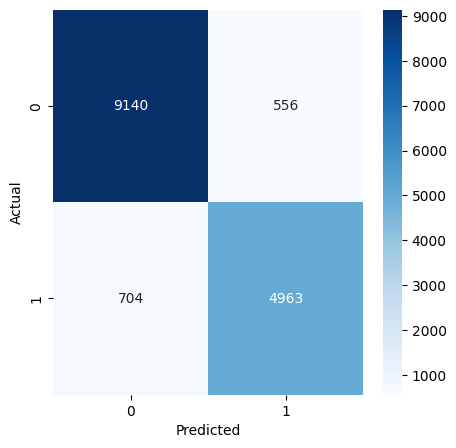

In [48]:
evaluate_scores(scores, y_va, display=True)

This are the best results so far and we did not need to complite it much, it just uses a pretrained model.